In [3]:
#import dependencies


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#from sklearn.grid_search import GridSearchCV
%matplotlib inline

In [4]:
#read in the dataset
data = pd.read_csv('cleaned_count.csv')

In [5]:
#dataset descriptions

# dataset shape
print("Shape of the dataset:")
print(data.shape)
# column names
print("Column names:")
print(data.columns)
# dtypes for columns
print("Datatype of each column:")
print(data.dtypes)

Shape of the dataset:
(14314, 10)
Column names:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'review_count', 'review_id', 'stars', 'text'],
      dtype='object')
Datatype of each column:
business_id      object
name             object
address          object
city             object
state            object
postal_code      object
review_count      int64
review_id        object
stars           float64
text             object
dtype: object


In [6]:
# summarization of dataset
data.describe(include='all')

,business_id,name,address,city,state,postal_code,review_count,review_id,stars,text
count,14314,14314,14314,14314,14314,14314,14314.000000,14314,14314.000000,14314
unique,3464,3072,3434,378,14,682,NaN,14314,NaN,14313
top,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,Philadelphia,PA,70130,NaN,KU_O5udG6zpxOg-VcAEodg,NaN,I was going to order delivery but the guy on t...
freq,187,187,187,2148,3342,991,NaN,1,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,474.553444,NaN,3.937614,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,698.569992,NaN,1.306335,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,229.000000,NaN,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,548.000000,NaN,5.000000,NaN


KeyError: "None of [Index(['length'], dtype='object')] are in the [columns]"

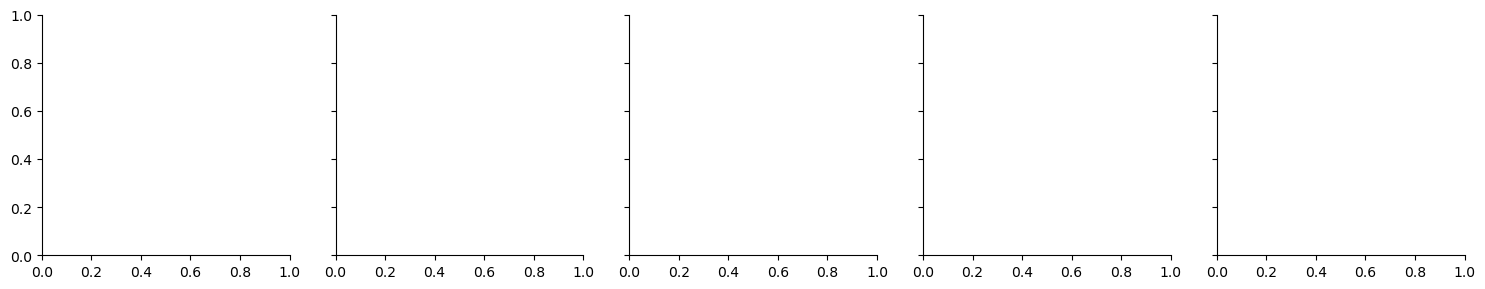

In [7]:
#review length to stars given visual
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.bar,'length',bins=50,color='purple')

In [8]:
#classify the dataset and split

data_classes = data[(data['stars']==1) | (data['stars']==2) | (data['stars']==3) |(data['stars']==4) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(14314, 10)
0    If you decide to eat here, just be aware it is...
1    Wow!  Yummy, different,  delicious.   Our favo...
2    Loved this tour! I grabbed a groupon and the p...
3    Had a party of 6 here for hibachi. Our waitres...
4    My experience with Shalimar was nothing but wo...
Name: text, dtype: object
0    3.0
1    5.0
2    5.0
3    3.0
4    5.0
Name: stars, dtype: float64


In [9]:
#cleaning which includes stopword and puncuation removal
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [10]:
#single reveiew vectorization to test for usability

vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)

print("Getting the words back:")
print(vocab.get_feature_names()[19648])
print(vocab.get_feature_names()[10643])

41130
If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it''s other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.
  (0, 434)	1
  (0, 9328)	1
  (0, 15466)	1
  (0, 16065)	1
  (0, 16173)	1
  (0, 16581)	1
  (0, 19183)	1
  (0, 20581)	1
  (0, 21113)	1
  (0, 21511)	1
  (0, 21972)	1
  (0, 22274)	1
  (0, 22763)	1
  (0, 22770)	1
  (0, 23655)	1
  (0, 24576)	1
  (0, 24594)	1
  (0, 25916)	1
  (0, 27775)	1
  (0, 27971)	1
  (0, 28015)	2
  (0, 28434)	1
  (0, 29538)	1
  (0, 29850)	1
  (0, 30608)	1
  (0, 30648)	1
  (0, 32014)	1
  (0, 33044)	1
  (0, 33970)	1
  (0, 36483)	1
  (0, 37700)	1
  (0, 37710)	1
  

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (14314, 41130)
Non-Zero occurences:  637821
Density of the matrix =  0.10833757038525425


In [18]:
#splitting the dataset, test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [19]:
#we will now test several models

#the first is random forest classifier
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 228    5    6   48  374]
 [  53    2    6  112  330]
 [  16    2    7  249  485]
 [   5    0    2  388 1459]
 [   5    0    0  147 3228]]
Score: 53.84
Classification Report:               precision    recall  f1-score   support

         1.0       0.74      0.34      0.47       661
         2.0       0.22      0.00      0.01       503
         3.0       0.33      0.01      0.02       759
         4.0       0.41      0.21      0.28      1854
         5.0       0.55      0.96      0.70      3380

    accuracy                           0.54      7157
   macro avg       0.45      0.30      0.29      7157
weighted avg       0.49      0.54      0.45      7157



In [20]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 287   69   60   93  152]
 [ 106   70   83  108  136]
 [  75   80  137  237  230]
 [  80  111  180  582  901]
 [ 113  127  153  749 2238]]
Score: 46.3
Classification Report:               precision    recall  f1-score   support

         1.0       0.43      0.43      0.43       661
         2.0       0.15      0.14      0.15       503
         3.0       0.22      0.18      0.20       759
         4.0       0.33      0.31      0.32      1854
         5.0       0.61      0.66      0.64      3380

    accuracy                           0.46      7157
   macro avg       0.35      0.35      0.35      7157
weighted avg       0.45      0.46      0.46      7157



In [21]:
#support vector machines
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 279   18    8   45  311]
 [  81   19   18  131  254]
 [  36   17   39  313  354]
 [   5    0   10  555 1284]
 [   9    1    0  252 3118]]
Score: 56.03
Classification Report:               precision    recall  f1-score   support

         1.0       0.68      0.42      0.52       661
         2.0       0.35      0.04      0.07       503
         3.0       0.52      0.05      0.09       759
         4.0       0.43      0.30      0.35      1854
         5.0       0.59      0.92      0.72      3380

    accuracy                           0.56      7157
   macro avg       0.51      0.35      0.35      7157
weighted avg       0.53      0.56      0.49      7157

